# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [40]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [11]:
employee.groupby(employee['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [7]:
employee.pivot_table(index = ['Department'], values = ['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [13]:
employee.pivot_table(index = ['Title'], values = ['Salary'], columns = ['Department'])

Salary            
Department     HR    IT Sales
Title                        
VP           70.0  70.0   NaN
analyst      32.5  32.5   NaN
associate     NaN  60.0  55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [19]:
employee.pivot_table(index = ['Title'], values = ['Salary', 'Years'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [30]:
employee.pivot_table(index = ['Title'], columns = ['Department'], values = ['Salary'], aggfunc =['mean', 'count'])

mean              count           
           Salary             Salary           
Department     HR    IT Sales     HR   IT Sales
Title                                          
VP           70.0  70.0   NaN    1.0  1.0   NaN
analyst      32.5  32.5   NaN    2.0  2.0   NaN
associate     NaN  60.0  55.0    NaN  1.0   2.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [32]:
employee.pivot_table(index = ['Department'], columns = ['Title'], values = ['Salary'], aggfunc =['mean', 'min', 'max', 'std'])

mean                      min                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    32.5       NaN   70.0    30.0       NaN   70.0    35.0   
IT           70.0    32.5      60.0   70.0    30.0      60.0   70.0    35.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

In [ ]:
# Since there is only one VP in HR and IT, one associate in IT, the mean, min, and max values for these parameters are the same. There is no VP and no analyst in Sales, no associate in HR, that is why we're getting NaNs. Standard deviation is zero for Sales associates because there salaries of those associates are equal. 


#### Based on your comments, fill the missing values with an appropriate value

In [33]:
employee.pivot_table(index = ['Department'], columns = ['Title'], values = ['Salary'], aggfunc =['mean', 'min', 'max', 'std'], fill_value=0)

mean                      min                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70    32.5         0     70      30         0     70      35   
IT             70    32.5        60     70      30        60     70      35   
Sales           0     0.0        55      0       0        55      0       0   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR                 0  3.535534         0  
IT                60  3.535534         0  
Sales             55  0.000000         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [68]:
employee.pivot_table(index = ['Department'], values = ['Salary','Name'], aggfunc = ({'Name':len, 'Salary': sum}))

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [69]:
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary','Years'], aggfunc = ({'Years':sum, 'Salary': 'mean'}))

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [71]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [72]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [74]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [77]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [79]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [80]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [81]:
time_grades = pd.read_csv('Time_Grades.csv')

In [82]:
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196305861D0>,
      dtype=object)

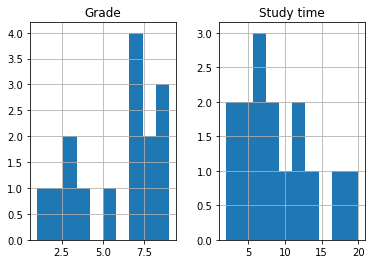

In [83]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [86]:
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [90]:
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here